# Marcos Cesar Ribeiro de Camargo - 9278045
## 22/08/2018 - Exercício 1

## Bibliotecas utilizadas

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Implementação do modelo de Perceptron Adaline

In [10]:
class Perceptron(object):
    weights = None
    
    def f(self, net, threshold=0.5):
        if(net >= threshold):
            return 1
        else:
            return -1

    def predict(self, x):
        X = np.concatenate((x, [1]))
        net = np.sum(np.multiply(X, self.weights))
        return(self.f(net))
    
    def train(self, X, Y, eta=0.05, threshold=10e-3, max_iter=2000):
        n, w = X.shape
        # Gerando pesos w e theta aleatóriamente 
        weights = (np.random.rand(w+1) - 0.5)
        
        t_error = 2*threshold
        counter = 0
        while(t_error > threshold and counter <= max_iter):
            t_error = 0
            # Para toda linha do conjuto de treinamento
            for i in range(n):

                # Concatenando X[i] com 1 para o theta
                Xi = np.concatenate((X[i], [1]))

                # Calculando net
                net = np.sum(np.multiply(Xi, weights))
                y_hat = self.f(net)

                # Calculando erro
                error = Y[i] - y_hat
                t_error = t_error + np.power(error, 2)

                # Treinando
                # Calculando o gradiente
                dE2_dweights = -2*error*Xi
                weights = weights - eta*dE2_dweights
            t_error = t_error/n
            counter = counter + 1
        self.weights = weights

## Geração aleatória dos dados de entrada
Foram definidos os vetores A e A_I que contém, respectivamente, o A e o A inverso perfeitos. Então foram sorteadas posições aleatórias desses vetores e invertidas

In [2]:
A   = [-1, -1, +1, -1, -1, -1, +1, -1, +1, -1, -1,
       +1, +1, +1, -1, +1, -1, -1, -1, +1, +1, -1, -1, -1, +1]
A_I = [+1, -1, -1, -1, +1, +1, -1, -1, -1, +1, -1,
       +1, +1, +1, -1, -1, +1, -1, +1, -1, -1, -1, +1, -1, -1]

As = []
A_Is = []

As.append(A)
A_Is.append(A_I)
for i in range(5):
    temp = A.copy()
    pos = random.randint(0, len(A)-1)
    temp[pos] = temp[pos]*-1
    As.append(temp)

    temp = A_I.copy()
    pos = random.randint(0, len(A_Is)-1)
    temp[pos] = temp[pos]*-1
    A_Is.append(temp)
    


### Plotagem dos valores de A obtidos, e os valores são salvos no arquivo A.data

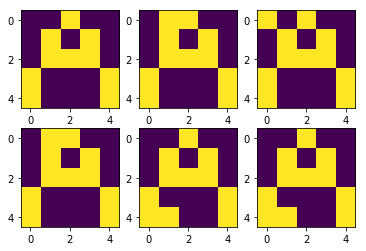

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    ax1 = fig.add_subplot(2,3, i+1)
    ax1.imshow(np.array(As[i]).reshape((5,5)))


to_save = np.array(As).astype(np.int)
np.savetxt('A.data', to_save, fmt='%i')

### Plotagem dos valores de A Invertido obtidos, e os valores são salvos no arquivo A_I.data

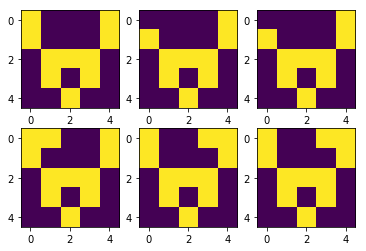

In [4]:
fig = plt.figure()
for i in range(6):
    ax1 = fig.add_subplot(2,3, i+1)
    ax1.imshow(np.array(A_Is[i]).reshape((5,5)))

to_save = np.array(A_Is).astype(np.int)
np.savetxt('A_I.data', to_save, fmt='%i')

### Carregando valores de A_I.data

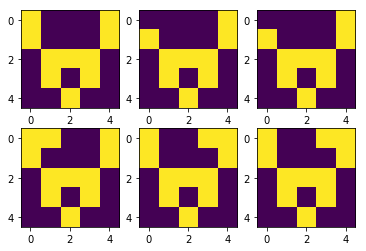

In [5]:
A_Is = np.loadtxt('A_I.data')
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(A_Is.shape[0]):
    ax1 = fig.add_subplot(2,3, i+1)
    ax1.imshow(np.array(A_Is[i]).reshape((5,5)))

### Carregando valores de A.data

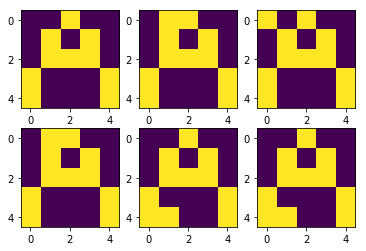

In [6]:
As = np.loadtxt('A.data')
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(As.shape[0]):
    ax1 = fig.add_subplot(2,3, i+1)
    ax1.imshow(np.array(As[i]).reshape((5,5)))

## Concatenando valores em um vetor de entrada X, gerando labels Y e treinando perceptron

In [11]:
# Concatenando A
X = As.copy()
Y = np.repeat(-1, As.shape[0])

#Concatenando A_I
X = np.append(X, A_Is)
Y = np.append(Y, np.repeat(1, A_Is.shape[0]))

# Transformando X em uma matriz com 12 entradas com uma
#    imagem de A (5x5) em cada linha
X = X.reshape((12, 25))

# Treinando perceptron adaline
P = Perceptron()
P.train(X, Y)

### Testando o modelo calculado

In [19]:
# Testando valores para o A
print('Os valores abaixo são correspondentes as imagens do A (label -1):')
for i in range(As.shape[0]):
    print(P.predict(As[i]))

print('\n')
# Testando valores para o A_I
print('Os valores abaixo são correspondentes as imagens do A Invertido (label 1):')
for i in range(A_Is.shape[0]):
    print(P.predict(A_Is[i]))


Os valores abaixo são correspondentes as imagens do A (label -1):
-1
-1
-1
-1
-1
-1


Os valores abaixo são correspondentes as imagens do A Invertido (label 1):
1
1
1
1
1
1


## Gerando modelos que não estão na base para teste

Predizendo imagem de A (label -1) gerado aleatóriamente:
-1


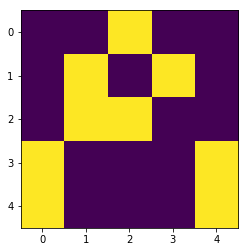

In [34]:
A   = [-1, -1, +1, -1, -1, -1, +1, -1, +1, -1, -1,
       +1, +1, +1, -1, +1, -1, -1, -1, +1, +1, -1, -1, -1, +1]
A_I = [+1, -1, -1, -1, +1, +1, -1, -1, -1, +1,
       -1, +1, +1, +1, -1, -1, +1, -1, +1, -1, -1, -1, +1, -1, -1]

temp = A.copy()
pos = random.randint(0, len(A)-1)
temp[pos] = temp[pos]*-1
print('Predizendo imagem de A (label -1) gerado aleatóriamente:')
print(P.predict(temp))
img = plt.imshow(np.array(temp).reshape((5,5)))




Predizendo imagem de A_I (label 1) gerado aleatóriamente:
1


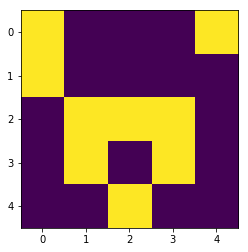

In [33]:
temp = A_I.copy()
pos = random.randint(0, len(A_I)-1)
temp[pos] = temp[pos]*-1
print('Predizendo imagem de A_I (label 1) gerado aleatóriamente:')
print(P.predict(temp))
img = plt.imshow(np.array(temp).reshape((5,5)))

# Resultados

É possivel concluir que o problema é linearmente separavel, pois pode ser aprendido por um perceptron do modelo adaline.